# Coordenadas Cromáticas y White-Patch

In [3]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [51]:
print(cv.__version__)

3.4.2



Tamaño imagen: (996, 908, 3) 


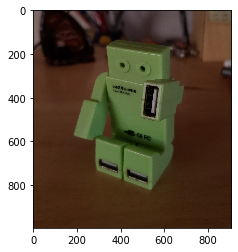

In [107]:
img_crom_1 = cv.imread('CoordCrom_1.png')[:,:,::-1]
img_crom_2 = cv.imread('CoordCrom_2.png')[:,:,::-1]
img_crom_3 = cv.imread('CoordCrom_3.png')[:,:,::-1]
img_wp_b = cv.imread('WP_B.png')[:,:,::-1]
img_wp_o = cv.imread('WP_O.png')[:,:,::-1]
img_wp_r = cv.imread('WP_R.png')[:,:,::-1]
img_test_b = cv.imread('test_blue.png')[:,:,::-1]
img_test_g = cv.imread('test_green.png')[:,:,::-1]
img_test_r = cv.imread('test_red.png')[:,:,::-1]

print('\nTamaño imagen: {} '.format(img_crom_3.shape))

plt.imshow(img_crom_2)
plt.show()

##  Coordenadas Cromáticas

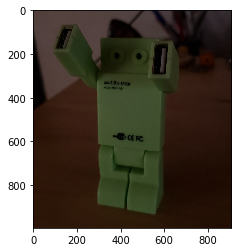

Se tardaron 1.37e+03 milisegundos en el cálculo iterativo
Se tardaron 37.01 milisegundos en el cálculo vectorizado


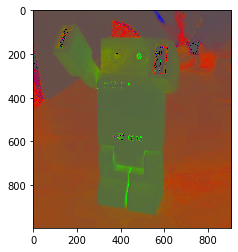

In [86]:
def coord_crom(img):
    r, g, b = cv.split(img)
    sum_rgb = r + g + b
    # Para evitar división por cero
    sum_rgb[sum_rgb == 0]=1
    # Escalo por 255
    r_nuevo = (r / sum_rgb)*255
    g_nuevo = (g / sum_rgb)*255
    b_nuevo = (b / sum_rgb)*255
    # Merge de los canales.
    imgRGB = cv.merge((np.uint8(r_nuevo), np.uint8(g_nuevo), np.uint8(b_nuevo)))
    return imgRGB

def coord_crom_iter(img):
    img_copy = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum_rgb = img.item(i, j , 0) + img.item(i, j , 1) + img.item(i, j , 2)
            if sum_rgb <= 0:
                sum_rgb = 1       
            r = img.item(i, j , 0) / sum_rgb
            g = img.item(i, j , 1) / sum_rgb
            b = img.item(i, j , 2) / sum_rgb
            img_copy.itemset((i,j,0), r*255)
            img_copy.itemset((i,j,1), g*255)
            img_copy.itemset((i,j,2), b*255)
    return img_copy
            
plt.imshow(img_crom_3)
plt.show()

e1 = cv.getTickCount()
imgRGB2 = coord_crom_iter(img_crom_3)
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print('Se tardaron {:0.4} milisegundos en el cálculo iterativo'.format(time*1000))

e1 = cv.getTickCount()
imgRGB2 = coord_crom(img_crom_3)
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print('Se tardaron {:0.4} milisegundos en el cálculo vectorizado'.format(time*1000))


plt.imshow(imgRGB2)
plt.show()




## White-patch

Se tardaron 1.396 milisegundos en White-Patch


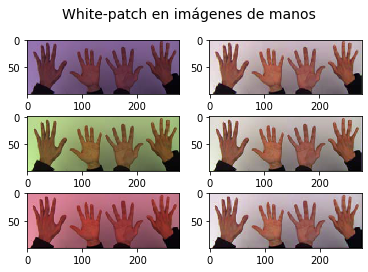

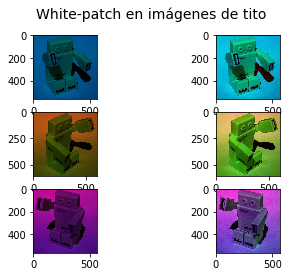

In [108]:
def white_patch(img):
    r, g, b = cv.split(img)
    max_r = np.amax(r)
    max_g = np.amax(g)
    max_b = np.amax(b)
    r_nuevo = (r / max_r)*255
    g_nuevo = (g / max_g)*255
    b_nuevo = (b / max_b)*255
    # Merge de los canales.
    imgRGB = cv.merge((np.uint8(r_nuevo), np.uint8(g_nuevo), np.uint8(b_nuevo)))
    return imgRGB


e1 = cv.getTickCount()
img_wp_test_b = white_patch(img_test_b)
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print('Se tardaron {:0.4} milisegundos en White-Patch'.format(time*1000))

img_wp_test_g = white_patch(img_test_g)
img_wp_test_r = white_patch(img_test_r)

fig_1, ax_1 = plt.subplots(3, 2)
plt.suptitle("White-patch en imágenes de manos", fontsize=14)
ax_1[0][0].imshow(img_test_b)
ax_1[0][1].imshow(img_wp_test_b)
ax_1[1][0].imshow(img_test_g)
ax_1[1][1].imshow(img_wp_test_g)
ax_1[2][0].imshow(img_test_r)
ax_1[2][1].imshow(img_wp_test_r)
plt.show()

img_wp_tito_b = white_patch(img_wp_b)
img_wp_tito_o = white_patch(img_wp_o)
img_wp_tito_r = white_patch(img_wp_r)

fig_1, ax_1 = plt.subplots(3, 2)
plt.suptitle("White-patch en imágenes de tito", fontsize=14)
ax_1[0][0].imshow(img_wp_b)
ax_1[0][1].imshow(img_wp_tito_b)
ax_1[1][0].imshow(img_wp_o)
ax_1[1][1].imshow(img_wp_tito_o)
ax_1[2][0].imshow(img_wp_r)
ax_1[2][1].imshow(img_wp_tito_r)
plt.show()


### White-Patch subsampling

[152 121 178]
Se tardaron 5.338 milisegundos en White-Patch


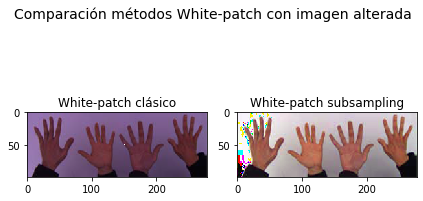

In [114]:
# Basado en https://ipg.fer.hr/_download/repository/Improving_the_White-patch_method_by_subsampling.pdf
# Se realizan M muestras aleatorias de N pixeles y se obtienen los valores máximos de los canales en cada muestra.
# se toma luego la media del vector y se procede con White-Patch clásico. De este modo es menos sensible a píxeles aisladosx
# de intensidad máxima

def wp_subsampling(img, N=50, M=50):
    max_values = np.zeros((M, 3))
    r, g, b = cv.split(img)
    for i in range(M):
        row_idx = np.random.permutation(img.shape[0])[0:N]
        col_idx = np.random.permutation(img.shape[1])[0:N]
        max_values[i, 0] = np.amax(r[row_idx, col_idx])
        max_values[i, 1] = np.amax(g[row_idx, col_idx])
        max_values[i, 2] = np.amax(b[row_idx, col_idx])
    rgb_max = np.mean(max_values, axis = 0, dtype=np.int64)
    print(rgb_max)
    r_nuevo = (r / rgb_max[0])*255
    g_nuevo = (g / rgb_max[1])*255
    b_nuevo = (b / rgb_max[2])*255
    # Merge de los canales.
    imgRGB = cv.merge((np.uint8(r_nuevo), np.uint8(g_nuevo), np.uint8(b_nuevo)))
    return imgRGB

# Se coloca un píxel con intensidad máxima 
img_test_b.itemset((50,150,0), 255)            
img_test_b.itemset((50,150,1), 255)            
img_test_b.itemset((50,150,2), 255)

e1 = cv.getTickCount()
img_wp_test_b = wp_subsampling(img_test_b)
e2 = cv.getTickCount()
time = (e2 - e1)/ cv.getTickFrequency()
print('Se tardaron {:0.4} milisegundos en White-Patch'.format(time*1000))

img_wp_test_b_1 = white_patch(img_test_b)

fig_1, ax_1 = plt.subplots(1, 2)
plt.suptitle("Comparación métodos White-patch con imagen alterada", fontsize=14)
ax_1[0].imshow(img_wp_test_b_1)
ax_1[1].imshow(img_wp_test_b)
ax_1[0].set_title("White-patch clásico")
ax_1[1].set_title("White-patch subsampling")
plt.tight_layout()

plt.show()

